In [6]:
import pandas as pd
df = pd.read_excel('data.xlsx')
df.head()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,DISBMONTH,LOAN_NUMBER,CD_SEGMENT,PRODUCT_CODE,ETC_NTC,PAYMENT_TYPE,CUST_PINCODE,CUST_STATE,MANUFACTURE_CODE,TENUR,...,TOTAL_NO_ENQ,TOTAL_NO_ENQ_LAST_3M,TOTAL_NO_ENQ_CD,TOTAL_NO_ENQ_CD_LAST_3M,TOTAL_NO_ENQ_SEC,TOTAL_NO_ENQ_SEC_LAST_3M,TOTAL_NO_ENQ_UNSEC,TOTAL_NO_ENQ_UNSEC_LAST_3M,BUREAU_SCORE,TARGET_VARIABLE
0,2022-10-31,1,MOBILE,MOBILE,NTC,ADM,517551.0,AP,OPPO,7.0,...,0,0,0,0,0,0,0,0,-1.0,0
1,2022-11-30,2,MOBILE,MOBILE,ETC,ADM,517002.0,AP,SAMSUNG,6.0,...,4,2,3,2,0,0,4,2,697.0,0
2,2022-10-31,3,MOBILE,MOBILE,ETC,ENCH,517132.0,AP,OPPO,8.0,...,0,0,0,0,0,0,0,0,759.0,0
3,2022-10-31,4,MOBILE,MOBILE,ETC,ADM,517130.0,AP,OPPO,7.0,...,2,1,2,1,0,0,2,1,775.0,0
4,2022-10-31,5,MOBILE,MOBILE,ETC,ADM,515212.0,AP,OPPO,7.0,...,8,2,2,0,2,0,4,0,708.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566102 entries, 0 to 566101
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DISBMONTH                      566102 non-null  datetime64[ns]
 1   LOAN_NUMBER                    566102 non-null  int64         
 2   CD_SEGMENT                     566102 non-null  object        
 3   PRODUCT_CODE                   566100 non-null  object        
 4   ETC_NTC                        566102 non-null  object        
 5   PAYMENT_TYPE                   566100 non-null  object        
 6   CUST_PINCODE                   566099 non-null  float64       
 7   CUST_STATE                     566102 non-null  object        
 8   MANUFACTURE_CODE               566100 non-null  object        
 9   TENUR                          566100 non-null  float64       
 10  ADVANCE_EMI_COUNT              566100 non-null  float64       
 11  

In [8]:
null_counts = df.isnull().sum()
print(null_counts[null_counts>0])

PRODUCT_CODE               2
PAYMENT_TYPE               2
CUST_PINCODE               3
MANUFACTURE_CODE           2
TENUR                      2
ADVANCE_EMI_COUNT          2
EMI                        2
LTV                        2
ASSET_COST                 2
ACTUAL_LOAN_AMOUNT        13
DOWN_PAYMENT               2
PAYNIMO_STATUS         79978
QUALIFICATION           2983
GENDER                     2
MARITALSTATUS              2
CUST_AGE                   9
MATCH_SCORE           342479
BUREAU_SCORE           67278
dtype: int64


In [9]:
# Filling minor values with mode value
columns_to_fill = null_counts[(null_counts >= 1) & (null_counts <= 15)].index

# Replace null values with the mode for each selected column
for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
# Dropping irrelevant columns
# DISBMONTH -> Useless
# LOAN_NUMBER -> Unique_identifier (if included causes overfitting)
# MATCH_SCORE -> Too many null values
df = df.drop(['DISBMONTH','MATCH_SCORE','LOAN_NUMBER'],axis = 1)
df = df.drop_duplicates()

In [11]:
df.shape

(565930, 46)

In [12]:
# from sklearn.impute import KNNImputer
# # Initialize the KNN Imputer
# imputer = KNNImputer(n_neighbors=5)

# # Perform imputation
# df= pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
# df.to_csv('output.csv', index=False)

df['BUREAU_SCORE'] = df['BUREAU_SCORE'].fillna(df['BUREAU_SCORE'].mean())
df['QUALIFICATION'] = df['QUALIFICATION'].fillna(df['QUALIFICATION'].mode()[0])
df['PAYNIMO_STATUS'] = df['PAYNIMO_STATUS'].fillna(df['PAYNIMO_STATUS'].mode()[0])
df.head()

,CD_SEGMENT,PRODUCT_CODE,ETC_NTC,PAYMENT_TYPE,CUST_PINCODE,CUST_STATE,MANUFACTURE_CODE,TENUR,ADVANCE_EMI_COUNT,EMI,...,TOTAL_NO_ENQ,TOTAL_NO_ENQ_LAST_3M,TOTAL_NO_ENQ_CD,TOTAL_NO_ENQ_CD_LAST_3M,TOTAL_NO_ENQ_SEC,TOTAL_NO_ENQ_SEC_LAST_3M,TOTAL_NO_ENQ_UNSEC,TOTAL_NO_ENQ_UNSEC_LAST_3M,BUREAU_SCORE,TARGET_VARIABLE
0,MOBILE,MOBILE,NTC,ADM,517551.0,AP,OPPO,7.0,1.0,2490.0,...,0,0,0,0,0,0,0,0,-1.0,0
1,MOBILE,MOBILE,ETC,ADM,517002.0,AP,SAMSUNG,6.0,0.0,4350.0,...,4,2,3,2,0,0,4,2,697.0,0
2,MOBILE,MOBILE,ETC,ENCH,517132.0,AP,OPPO,8.0,2.0,3825.0,...,0,0,0,0,0,0,0,0,759.0,0
3,MOBILE,MOBILE,ETC,ADM,517130.0,AP,OPPO,7.0,1.0,1942.0,...,2,1,2,1,0,0,2,1,775.0,0
4,MOBILE,MOBILE,ETC,ADM,515212.0,AP,OPPO,7.0,1.0,3372.0,...,8,2,2,0,2,0,4,0,708.0,0


In [13]:
# Checking if any object field exists
columns = df.select_dtypes(include = 'object')
distinct_values = columns.nunique()
distinct_values

CD_SEGMENT           2
PRODUCT_CODE        15
ETC_NTC              2
PAYMENT_TYPE         4
CUST_STATE          23
MANUFACTURE_CODE    48
PAYNIMO_STATUS       4
QUALIFICATION       22
GENDER               2
MARITALSTATUS        3
EMP_GRP              6
dtype: int64

In [14]:
# Checking for null values
df.isnull().sum()

CD_SEGMENT                       0
PRODUCT_CODE                     0
ETC_NTC                          0
PAYMENT_TYPE                     0
CUST_PINCODE                     0
CUST_STATE                       0
MANUFACTURE_CODE                 0
TENUR                            0
ADVANCE_EMI_COUNT                0
EMI                              0
LTV                              0
ASSET_COST                       0
ACTUAL_LOAN_AMOUNT               0
DOWN_PAYMENT                     0
PAYNIMO_STATUS                   0
QUALIFICATION                    0
GENDER                           0
MARITALSTATUS                    0
CUST_AGE                         0
EMP_GRP                          0
TOTAL_NO_LV_TRADELINES           0
BUREAU_VINTAGE_IN_MONTHS         0
NO_TRADELINES_OPENED_LAST_3M     0
TOTAL_NO_LV_CD                   0
TIME_SINCE_FIRST_CD_MONTHS       0
NO_CD_OPENED_LAST_3M             0
TOTAL_NO_LV_CC                   0
NO_CC_OPENED_LAST_3M             0
TOTAL_NO_LV_PLBL    

In [15]:
# Converting Categorical values to numerical values

from sklearn.preprocessing import OrdinalEncoder
# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Select all object (categorical) columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply the encoder to the categorical columns
df[categorical_columns] = encoder.fit_transform(df[categorical_columns])

In [16]:
# 1. Credit Utilization Ratio (CUR)
df['CUR'] = ((df['ACTUAL_LOAN_AMOUNT']+1) / (df['ASSET_COST']+1)) * 100

# 2. EMI to Income Ratio (EIR) - here assuming 'EMP_GRP' is a proxy for income
df['EIR'] = (df['EMI'] +1)/ ((df['CUST_AGE'] * df['EMP_GRP'])+1)

# 3. Loan Tenure to Bureau Vintage Ratio (LTVR)
df['LTVR'] = (df['TENUR']+1) / (df['BUREAU_VINTAGE_IN_MONTHS']+1)

# 4. Loan to Secured Credit Ratio (LSCR)
df['LSCR'] = (df['ACTUAL_LOAN_AMOUNT']+1) /(1+df['TOTAL_NO_LV_SEC'])

# 5. Enquiry to Loan Ratio (ELR)
df['ELR'] = (1+df['TOTAL_NO_ENQ']) / (df['TOTAL_NO_LV_TRADELINES'] + 1)

# 6. Secured vs. Unsecured Loan Ratio (SULR)
df['SULR'] = (1+df['TOTAL_NO_LV_SEC']) / (1+df['TOTAL_NO_LV_UNSEC'])

# 7. Recent Credit Activity Score (RCAS)
df['RCAS'] = (df['NO_TRADELINES_OPENED_LAST_3M'] + df['NO_CD_OPENED_LAST_3M'] + df['NO_CC_OPENED_LAST_3M']+1) / (1+df['BUREAU_VINTAGE_IN_MONTHS'])

# 8. Advance EMI Coverage Ratio (AECR)
df['AECR'] = ((df['ADVANCE_EMI_COUNT'] * df['EMI'])+1) / (1+df['ACTUAL_LOAN_AMOUNT'])

# 9. Credit Diversity Index (CDI)
df['CDI'] = (df['TOTAL_NO_LV_CD'] + df['TOTAL_NO_LV_CC'] + df['TOTAL_NO_LV_PLBL'] + 
             df['TOTAL_NO_LV_AL'] + df['TOTAL_NO_LV_TW'] + df['TOTAL_NO_LV_TL']+1) / (1+df['TOTAL_NO_LV_TRADELINES'])

# 10. Loan to Down Payment Ratio (LDPR)
df['LDPR'] = (1+df['ACTUAL_LOAN_AMOUNT']) / (1+df['DOWN_PAYMENT'])

In [17]:
df.isnull().sum()

CD_SEGMENT                       0
PRODUCT_CODE                     0
ETC_NTC                          0
PAYMENT_TYPE                     0
CUST_PINCODE                     0
CUST_STATE                       0
MANUFACTURE_CODE                 0
TENUR                            0
ADVANCE_EMI_COUNT                0
EMI                              0
LTV                              0
ASSET_COST                       0
ACTUAL_LOAN_AMOUNT               0
DOWN_PAYMENT                     0
PAYNIMO_STATUS                   0
QUALIFICATION                    0
GENDER                           0
MARITALSTATUS                    0
CUST_AGE                         0
EMP_GRP                          0
TOTAL_NO_LV_TRADELINES           0
BUREAU_VINTAGE_IN_MONTHS         0
NO_TRADELINES_OPENED_LAST_3M     0
TOTAL_NO_LV_CD                   0
TIME_SINCE_FIRST_CD_MONTHS       0
NO_CD_OPENED_LAST_3M             0
TOTAL_NO_LV_CC                   0
NO_CC_OPENED_LAST_3M             0
TOTAL_NO_LV_PLBL    

In [12]:
# # Final Clean Data to be used
# df.to_csv('output.csv',index=False)

/var/folders/vl/th6hz76s2vb232d7cvffnrfh0000gn/T/ipykernel_56118/3825685430.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Chi-squared', y='Feature', data=chi2_df, palette='viridis')
/var/folders/vl/th6hz76s2vb232d7cvffnrfh0000gn/T/ipykernel_56118/3825685430.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='p-value', y='Feature', data=p_values_df, palette='viridis')


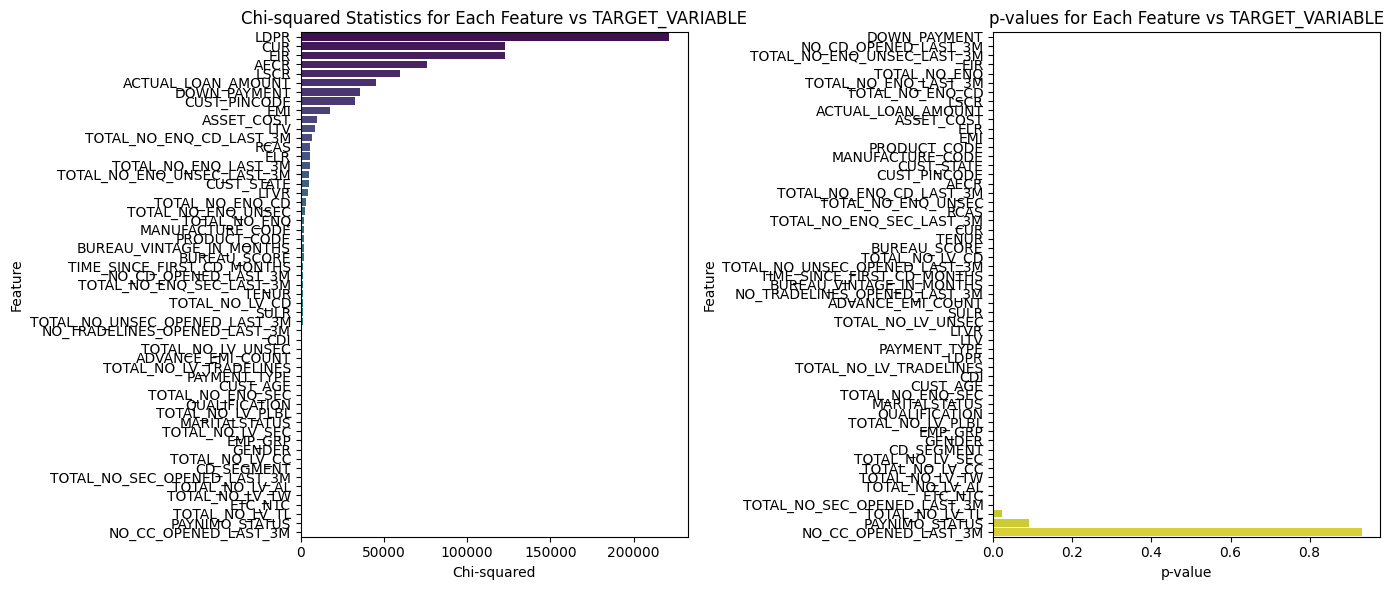

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

X = df.drop(columns=['TARGET_VARIABLE'])

# Encode TARGET_VARIABLE if it's not already encoded
if df['TARGET_VARIABLE'].dtype == 'object':
    le = LabelEncoder()
    df['TARGET_VARIABLE'] = le.fit_transform(df['TARGET_VARIABLE'])

# List to store chi-squared statistics and p-values
chi2_stats = []
p_values = []

# Loop through each feature
for feature in X.columns:
    if df[feature].dtype == 'object':
        # Convert categorical features to numerical using Label Encoding
        df[feature] = LabelEncoder().fit_transform(df[feature])
    
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df['TARGET_VARIABLE'])
    
    # Perform the Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store the results
    chi2_stats.append((feature, chi2))
    p_values.append((feature, p))

# Convert the results to DataFrames for plotting
chi2_df = pd.DataFrame(chi2_stats, columns=['Feature', 'Chi-squared']).sort_values(by='Chi-squared', ascending=False)
p_values_df = pd.DataFrame(p_values, columns=['Feature', 'p-value']).sort_values(by='p-value')

# Plot the Chi-squared statistics
plt.figure(figsize=(14, 6))

# Plot Chi-squared statistics
plt.subplot(1, 2, 1)
sns.barplot(x='Chi-squared', y='Feature', data=chi2_df, palette='viridis')
plt.title('Chi-squared Statistics for Each Feature vs TARGET_VARIABLE')

# Plot p-values
plt.subplot(1, 2, 2)
sns.barplot(x='p-value', y='Feature', data=p_values_df, palette='viridis')
plt.title('p-values for Each Feature vs TARGET_VARIABLE')

plt.tight_layout()
plt.savefig('image_1.png')
plt.show()

In [19]:
p_values_df

,Feature,p-value
13,DOWN_PAYMENT,0.000000e+00
25,NO_CD_OPENED_LAST_3M,0.000000e+00
43,TOTAL_NO_ENQ_UNSEC_LAST_3M,0.000000e+00
46,EIR,0.000000e+00
36,TOTAL_NO_ENQ,0.000000e+00
37,TOTAL_NO_ENQ_LAST_3M,0.000000e+00
38,TOTAL_NO_ENQ_CD,0.000000e+00
48,LSCR,0.000000e+00
12,ACTUAL_LOAN_AMOUNT,0.000000e+00
11,ASSET_COST,0.000000e+00


In [20]:
df = df.drop(['PAYNIMO_STATUS','NO_CC_OPENED_LAST_3M'], axis = 1)

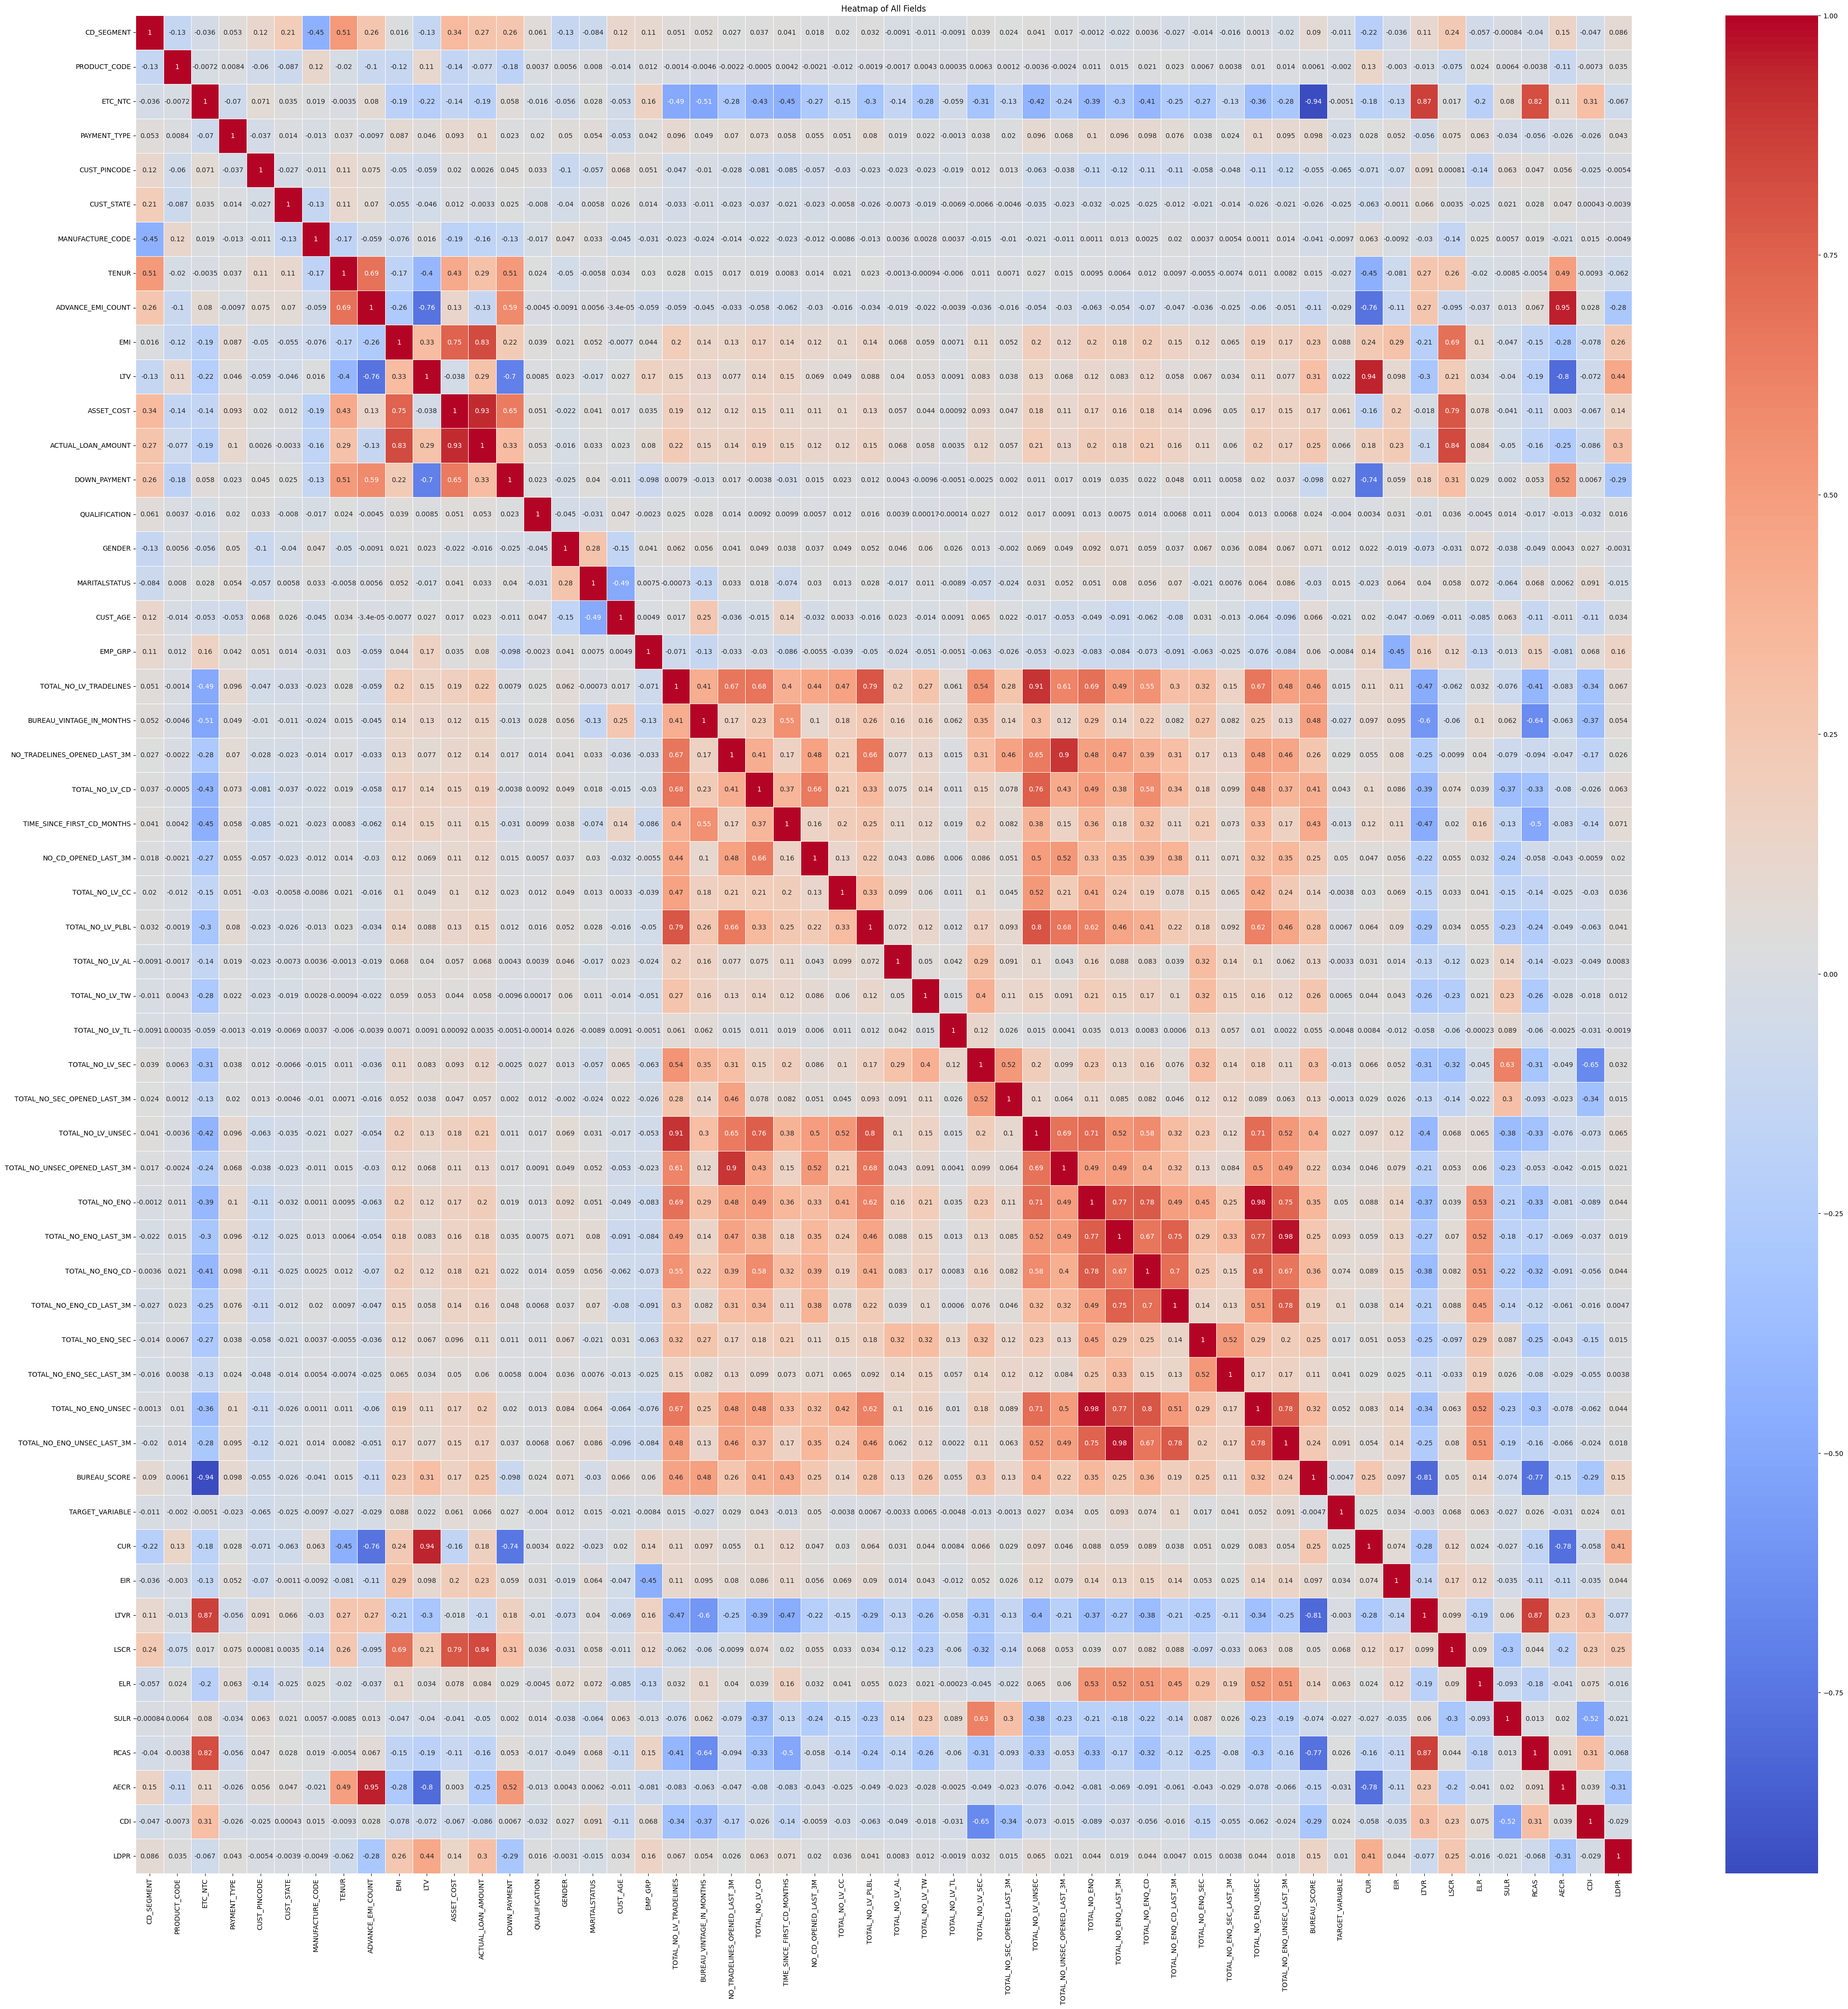

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(50, 50))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Add titles and labels
plt.title('Heatmap of All Fields')
#plt.savefig('image_2.png')
plt.show()

In [22]:
import numpy as np
# Find pairs of features with correlation >= 0.9
high_corr_var = np.where(abs(corr_matrix) >= 0.8)
high_corr_pairs = [(corr_matrix.columns[x], corr_matrix.columns[y]) 
                   for x, y in zip(*high_corr_var) if x != y and x < y]

# Create a set to keep track of features to remove
features_to_remove = set()

# Iterate over the pairs and choose which feature to remove
for feature1, feature2 in high_corr_pairs:
    if feature1 not in features_to_remove and feature2 not in features_to_remove:
        # For simplicity, let's remove the second feature in each pair
        features_to_remove.add(feature2)

# Drop the selected features from the DataFrame
df = df.drop(columns=features_to_remove)

In [23]:
columns_list = df.columns.tolist()
print(columns_list)

['CD_SEGMENT', 'PRODUCT_CODE', 'ETC_NTC', 'PAYMENT_TYPE', 'CUST_PINCODE', 'CUST_STATE', 'MANUFACTURE_CODE', 'TENUR', 'ADVANCE_EMI_COUNT', 'EMI', 'LTV', 'ASSET_COST', 'DOWN_PAYMENT', 'QUALIFICATION', 'GENDER', 'MARITALSTATUS', 'CUST_AGE', 'EMP_GRP', 'TOTAL_NO_LV_TRADELINES', 'BUREAU_VINTAGE_IN_MONTHS', 'NO_TRADELINES_OPENED_LAST_3M', 'TOTAL_NO_LV_CD', 'TIME_SINCE_FIRST_CD_MONTHS', 'NO_CD_OPENED_LAST_3M', 'TOTAL_NO_LV_CC', 'TOTAL_NO_LV_PLBL', 'TOTAL_NO_LV_AL', 'TOTAL_NO_LV_TW', 'TOTAL_NO_LV_TL', 'TOTAL_NO_LV_SEC', 'TOTAL_NO_SEC_OPENED_LAST_3M', 'TOTAL_NO_ENQ', 'TOTAL_NO_ENQ_LAST_3M', 'TOTAL_NO_ENQ_CD', 'TOTAL_NO_ENQ_CD_LAST_3M', 'TOTAL_NO_ENQ_SEC', 'TOTAL_NO_ENQ_SEC_LAST_3M', 'TARGET_VARIABLE', 'EIR', 'LSCR', 'ELR', 'SULR', 'CDI', 'LDPR']


In [24]:
df.shape

(565930, 44)

In [20]:
# from sklearn.utils import resample
# df_copy = df.copy()

# # Separate the majority and minority classes
# majority_class = df[df['TARGET_VARIABLE'] == 0]
# minority_class = df[df['TARGET_VARIABLE'] == 1]

# # Undersample the majority class
# undersampled_majority_class = resample(majority_class,
#                                        replace=False,  # without replacement
#                                        n_samples=10*len(minority_class),  # to match minority class size
#                                        random_state=0)  # for reproducibility

# # Combine the undersampled majority class with the minority class
# undersampled_df = pd.concat([undersampled_majority_class, minority_class])

# # Shuffle the dataset (optional but recommended)
# df = undersampled_df.sample(frac=1, random_state=0).reset_index(drop=True)


In [28]:
final_features = df[['CD_SEGMENT', 'PRODUCT_CODE', 'ETC_NTC', 'PAYMENT_TYPE', 'CUST_PINCODE', 'CUST_STATE', 'MANUFACTURE_CODE', 'TENUR', 'ADVANCE_EMI_COUNT', 'EMI', 'LTV', 'ASSET_COST', 'DOWN_PAYMENT', 'QUALIFICATION', 'GENDER', 'MARITALSTATUS', 'CUST_AGE', 'EMP_GRP', 'TOTAL_NO_LV_TRADELINES', 'BUREAU_VINTAGE_IN_MONTHS', 'NO_TRADELINES_OPENED_LAST_3M', 'TOTAL_NO_LV_CD', 'TIME_SINCE_FIRST_CD_MONTHS', 'NO_CD_OPENED_LAST_3M', 'TOTAL_NO_LV_CC', 'TOTAL_NO_LV_PLBL', 'TOTAL_NO_LV_AL', 'TOTAL_NO_LV_TW', 'TOTAL_NO_LV_TL', 'TOTAL_NO_LV_SEC', 'TOTAL_NO_SEC_OPENED_LAST_3M', 'TOTAL_NO_ENQ', 'TOTAL_NO_ENQ_LAST_3M', 'TOTAL_NO_ENQ_CD', 'TOTAL_NO_ENQ_CD_LAST_3M', 'TOTAL_NO_ENQ_SEC', 'TOTAL_NO_ENQ_SEC_LAST_3M', 'EIR', 'LSCR', 'ELR', 'SULR', 'CDI', 'LDPR']]

In [ ]:
# final_features = df[['CD_SEGMENT', 'PRODUCT_CODE', 'ETC_NTC', 'PAYMENT_TYPE', 'CUST_PINCODE', 'CUST_STATE', 'MANUFACTURE_CODE', 'TENUR', 'ADVANCE_EMI_COUNT', 'EMI', 'LTV', 'ASSET_COST', 'DOWN_PAYMENT', 'QUALIFICATION', 'GENDER', 'MARITALSTATUS', 'CUST_AGE', 'EMP_GRP', 'TOTAL_NO_LV_TRADELINES', 'BUREAU_VINTAGE_IN_MONTHS', 'NO_TRADELINES_OPENED_LAST_3M', 'TOTAL_NO_LV_CD', 'TIME_SINCE_FIRST_CD_MONTHS', 'NO_CD_OPENED_LAST_3M', 'TOTAL_NO_LV_CC', 'TOTAL_NO_LV_PLBL', 'TOTAL_NO_LV_AL', 'TOTAL_NO_LV_TW', 'TOTAL_NO_LV_TL', 'TOTAL_NO_LV_SEC', 'TOTAL_NO_SEC_OPENED_LAST_3M', 'TOTAL_NO_ENQ', 'TOTAL_NO_ENQ_LAST_3M', 'TOTAL_NO_ENQ_CD', 'TOTAL_NO_ENQ_CD_LAST_3M', 'TOTAL_NO_ENQ_SEC', 'TOTAL_NO_ENQ_SEC_LAST_3M']]

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
# from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, roc_auc_score, roc_curve
# from sklearn.ensemble import RandomForestClassifier
# from imblearn.over_sampling import SMOTE

# # Assume 'data' is your DataFrame and 'target' is the column name of your target variable
# X = final_features  # Replace 'final_features' with your actual feature set
# y = df['TARGET_VARIABLE']  # Replace 'TARGET_VARIABLE' with your actual target column name

# # Split data into 70:30 train:test ratio using stratified sampling
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# # Oversampling minority class using SMOTE
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

# # Define the parameter grid for tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'bootstrap': [True, False],
#     'class_weight': ['balanced', 'balanced_subsample', None]  # Handle class imbalance
# }

# # Create the F1 scorer
# f1_scorer = make_scorer(f1_score)

# # StratifiedKFold ensures the same class distribution in each fold
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Initialize the RandomForestClassifier
# rf = RandomForestClassifier(random_state=42)

# # Perform RandomizedSearchCV to tune the model's hyperparameters for maximizing F1-score
# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
#                                    scoring='f1', n_iter=3, cv=cv, 
#                                    verbose=1, random_state=42, n_jobs=-1)

# # Fit the model
# random_search.fit(X_train, y_train)

# # Best model and hyperparameters
# best_model = random_search.best_estimator_
# best_params = random_search.best_params_

# print(f"Best F1 Score: {random_search.best_score_}")
# print(f"Best Parameters: {best_params}")

# # Fit the best model on the full training data
# best_model.fit(X_train, y_train)

# # Get predicted probabilities for the test set
# y_test_proba = best_model.predict_proba(X_test)[:, 1]

# # Initialize variables to track the best threshold and corresponding F1 score
# best_f1 = 0
# best_threshold = 0.5
# thresholds = np.arange(0.05, 1.05, 0.05)

# for threshold in thresholds:
#     y_test_pred = (y_test_proba >= threshold).astype(int)
#     f1 = f1_score(y_test, y_test_pred)
#     if f1 > best_f1:
#         best_f1 = f1
#         best_threshold = threshold

# # Apply the best threshold found
# y_test_pred = (y_test_proba >= best_threshold).astype(int)

# # Calculate the metrics
# accuracy = accuracy_score(y_test, y_test_pred)
# recall = recall_score(y_test, y_test_pred)
# auc = roc_auc_score(y_test, y_test_proba)
# f1 = f1_score(y_test, y_test_pred)
# cm = confusion_matrix(y_test, y_test_pred)

# # Sensitivity (Recall for positive class)
# sensitivity = recall  # Sensitivity is the same as recall for the positive class

# print(f"Best Threshold: {best_threshold:.2f}")
# print(f"Accuracy: {accuracy:.4f}")
# print(f"Sensitivity (Recall): {sensitivity:.4f}")
# print(f"AUC Score: {auc:.4f}")
# print(f"F1 Score: {f1:.4f}")

# # Plot the confusion matrix as a heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix Heatmap')
# plt.savefig('rf_confusion_matrix.png')
# plt.show()

# # Plot ROC Curve
# fpr, tpr, _ = roc_curve(y_test, y_test_proba)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc='best')
# plt.savefig('rf_roc_curve.png')
# plt.show()


In [26]:
df.isnull().sum()

CD_SEGMENT                      0
PRODUCT_CODE                    0
ETC_NTC                         0
PAYMENT_TYPE                    0
CUST_PINCODE                    0
CUST_STATE                      0
MANUFACTURE_CODE                0
TENUR                           0
ADVANCE_EMI_COUNT               0
EMI                             0
LTV                             0
ASSET_COST                      0
DOWN_PAYMENT                    0
QUALIFICATION                   0
GENDER                          0
MARITALSTATUS                   0
CUST_AGE                        0
EMP_GRP                         0
TOTAL_NO_LV_TRADELINES          0
BUREAU_VINTAGE_IN_MONTHS        0
NO_TRADELINES_OPENED_LAST_3M    0
TOTAL_NO_LV_CD                  0
TIME_SINCE_FIRST_CD_MONTHS      0
NO_CD_OPENED_LAST_3M            0
TOTAL_NO_LV_CC                  0
TOTAL_NO_LV_PLBL                0
TOTAL_NO_LV_AL                  0
TOTAL_NO_LV_TW                  0
TOTAL_NO_LV_TL                  0
TOTAL_NO_LV_SE

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:56:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:56:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:56:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:56:58] WARNING: /Users/runner/work/xgboost/xgboost/src

Best F1 Score: 0.9801205520182734
Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:00:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9411
Sensitivity (Recall): 0.2050
AUC Score: 0.7575
F1 Score: 0.1794


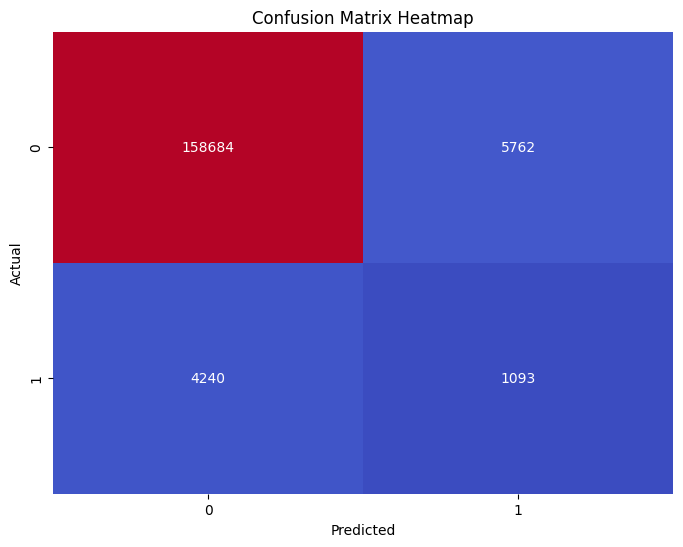

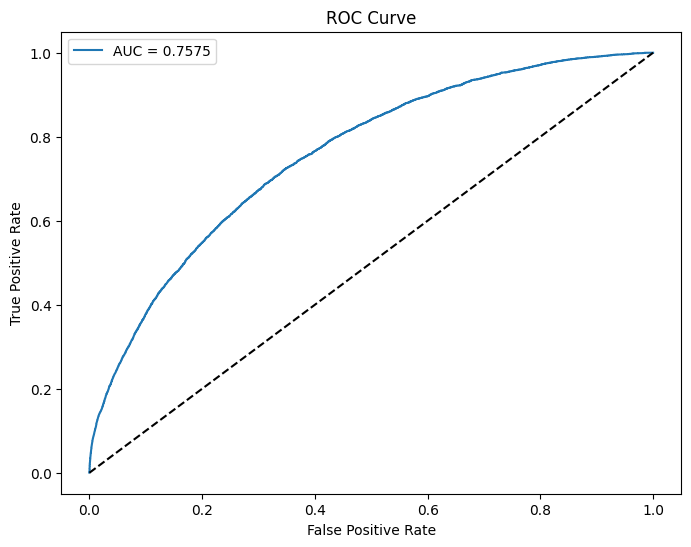

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import f1_score, confusion_matrix, make_scorer, accuracy_score, recall_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Assume 'data' is your DataFrame and 'target' is the column name of your target variable
X = final_features  # Replace 'final_features' with your actual feature set
y = df['TARGET_VARIABLE']  # Replace 'TARGET_VARIABLE' with your actual target column name

# Split data into 70:30 train:test ratio using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Oversampling minority class
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [(y_train.value_counts()[0] / y_train.value_counts()[1])]
}

# Create the F1 scorer
f1_scorer = make_scorer(f1_score)

# StratifiedKFold ensures the same class distribution in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Perform RandomizedSearchCV to tune the model's hyperparameters for maximizing F1-score
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, 
                                   scoring=f1_scorer, n_iter=5, cv=cv, 
                                   verbose=1, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Best model and hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

print(f"Best F1 Score: {random_search.best_score_}")
print(f"Best Parameters: {best_params}")

# Train on full data with best parameters
best_model.fit(X_train, y_train)

# Get predicted probabilities for the test set
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Initialize variables to track the best threshold and corresponding F1 score
best_f1 = 0.05
best_threshold = 0.5
thresholds = np.arange(0.05, 1.05, 0.05)

for threshold in thresholds:
    y_test_pred = (y_test_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_test_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

# Apply the best threshold found
y_test_pred = (y_test_proba >= best_threshold).astype(int)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_proba)
f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

# Sensitivity (Recall for positive class)
sensitivity = recall  # Sensitivity is the same as recall for the positive class

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"AUC Score: {auc:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.savefig('image_3.png')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.savefig('image_4.png')
plt.show()


In [ ]:
# Extract feature importances from the best model
feature_importances = best_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.savefig('image_5.png')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Compute Precision-Recall and plot curve
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
pr_auc = auc(recall, precision)
plt.figure(figsize=(10, 6))
sns.lineplot(x=recall, y=precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()